In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/top 240 restaurants recommanded in los angeles 2.csv')
df.head()

,Rank,CommentDate,Date,RestaurantName,Comment,Address,StarRating,NumberOfReviews,Style,Price
0,1,2023-09-16,2023-09-17,GRANVILLE,Great ambiance indoors and attentive staff. Re...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
1,1,2023-09-15,2023-09-17,GRANVILLE,Wrong wrong wrong. AIf you don't fit the Ty ...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
2,1,2023-09-07,2023-09-17,GRANVILLE,Bad service!! The worst servers. Marcos the ma...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
3,1,2023-09-06,2023-09-17,GRANVILLE,One of my absolute favorite places in WeHo for...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
4,1,2023-09-05,2023-09-17,GRANVILLE,Always a good experience and food is great.Tea...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$


# EDA

In [2]:
print('Get the infomation of the dataset')
df.info()

Get the infomation of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             2381 non-null   int64  
 1   CommentDate      2381 non-null   object 
 2   Date             2381 non-null   object 
 3   RestaurantName   2381 non-null   object 
 4   Comment          2381 non-null   object 
 5   Address          2371 non-null   object 
 6   StarRating       2381 non-null   float64
 7   NumberOfReviews  2381 non-null   int64  
 8   Style            2381 non-null   object 
 9   Price            1745 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 186.1+ KB


In [3]:
df.describe()

,Rank,StarRating,NumberOfReviews
count,2381.000000,2381.000000,2381.000000
mean,120.173457,4.304662,1141.541369
std,68.925564,0.312753,1531.834833
min,1.000000,3.500000,2.000000
25%,61.000000,4.100000,129.000000
50%,119.000000,4.300000,518.000000
75%,180.000000,4.500000,1623.000000
max,240.000000,5.000000,10020.000000


In [4]:
# cheching the missing values in each columns
df.isnull().sum()

,0
Rank,0
CommentDate,0
Date,0
RestaurantName,0
Comment,0
Address,10
StarRating,0
NumberOfReviews,0
Style,0
Price,636


In [5]:
df.drop('Price', inplace=True,axis=1)

In [6]:
#distribution of categorical columns
print("Unique values in categorical columns:")
print(df['Style'].value_counts())


Unique values in categorical columns:
Style
Korean                                                 65
American (New), Cocktail Bars                          61
American (New)                                         60
Italian                                                41
Thai                                                   30
                                                       ..
Vegan, African                                          9
Cafes                                                   8
Japanese, Hot Pot, Venues & Event Spaces                7
Bars, Italian                                           3
Burgers, Pop-Up Restaurants, American (Traditional)     2
Name: count, Length: 197, dtype: int64


# Univariate analysis

Distribution of Star Ratings

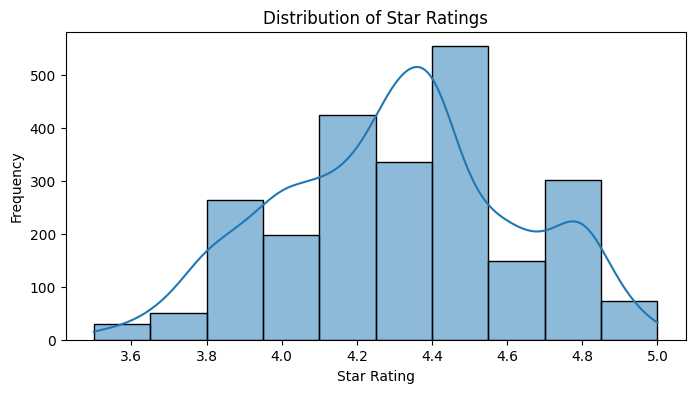

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df['StarRating'],bins=10,kde=True)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()

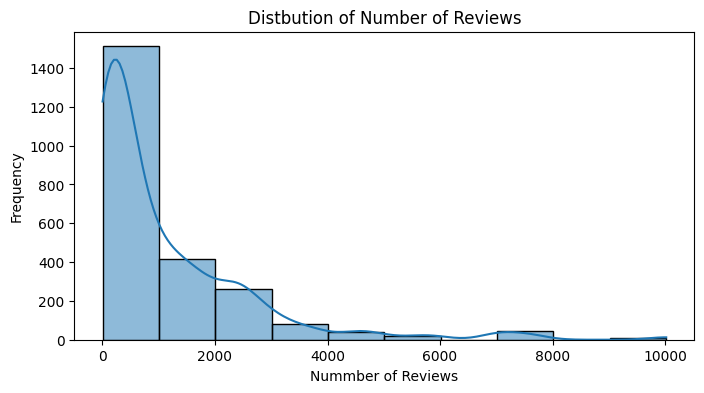

In [8]:
# Distribution of Number of Reviews
plt.figure(figsize=(8,4))
sns.histplot(df['NumberOfReviews'],bins=10,kde=True)
plt.title('Distbution of Number of Reviews')
plt.xlabel('Nummber of Reviews')
plt.ylabel('Frequency')
plt.show()

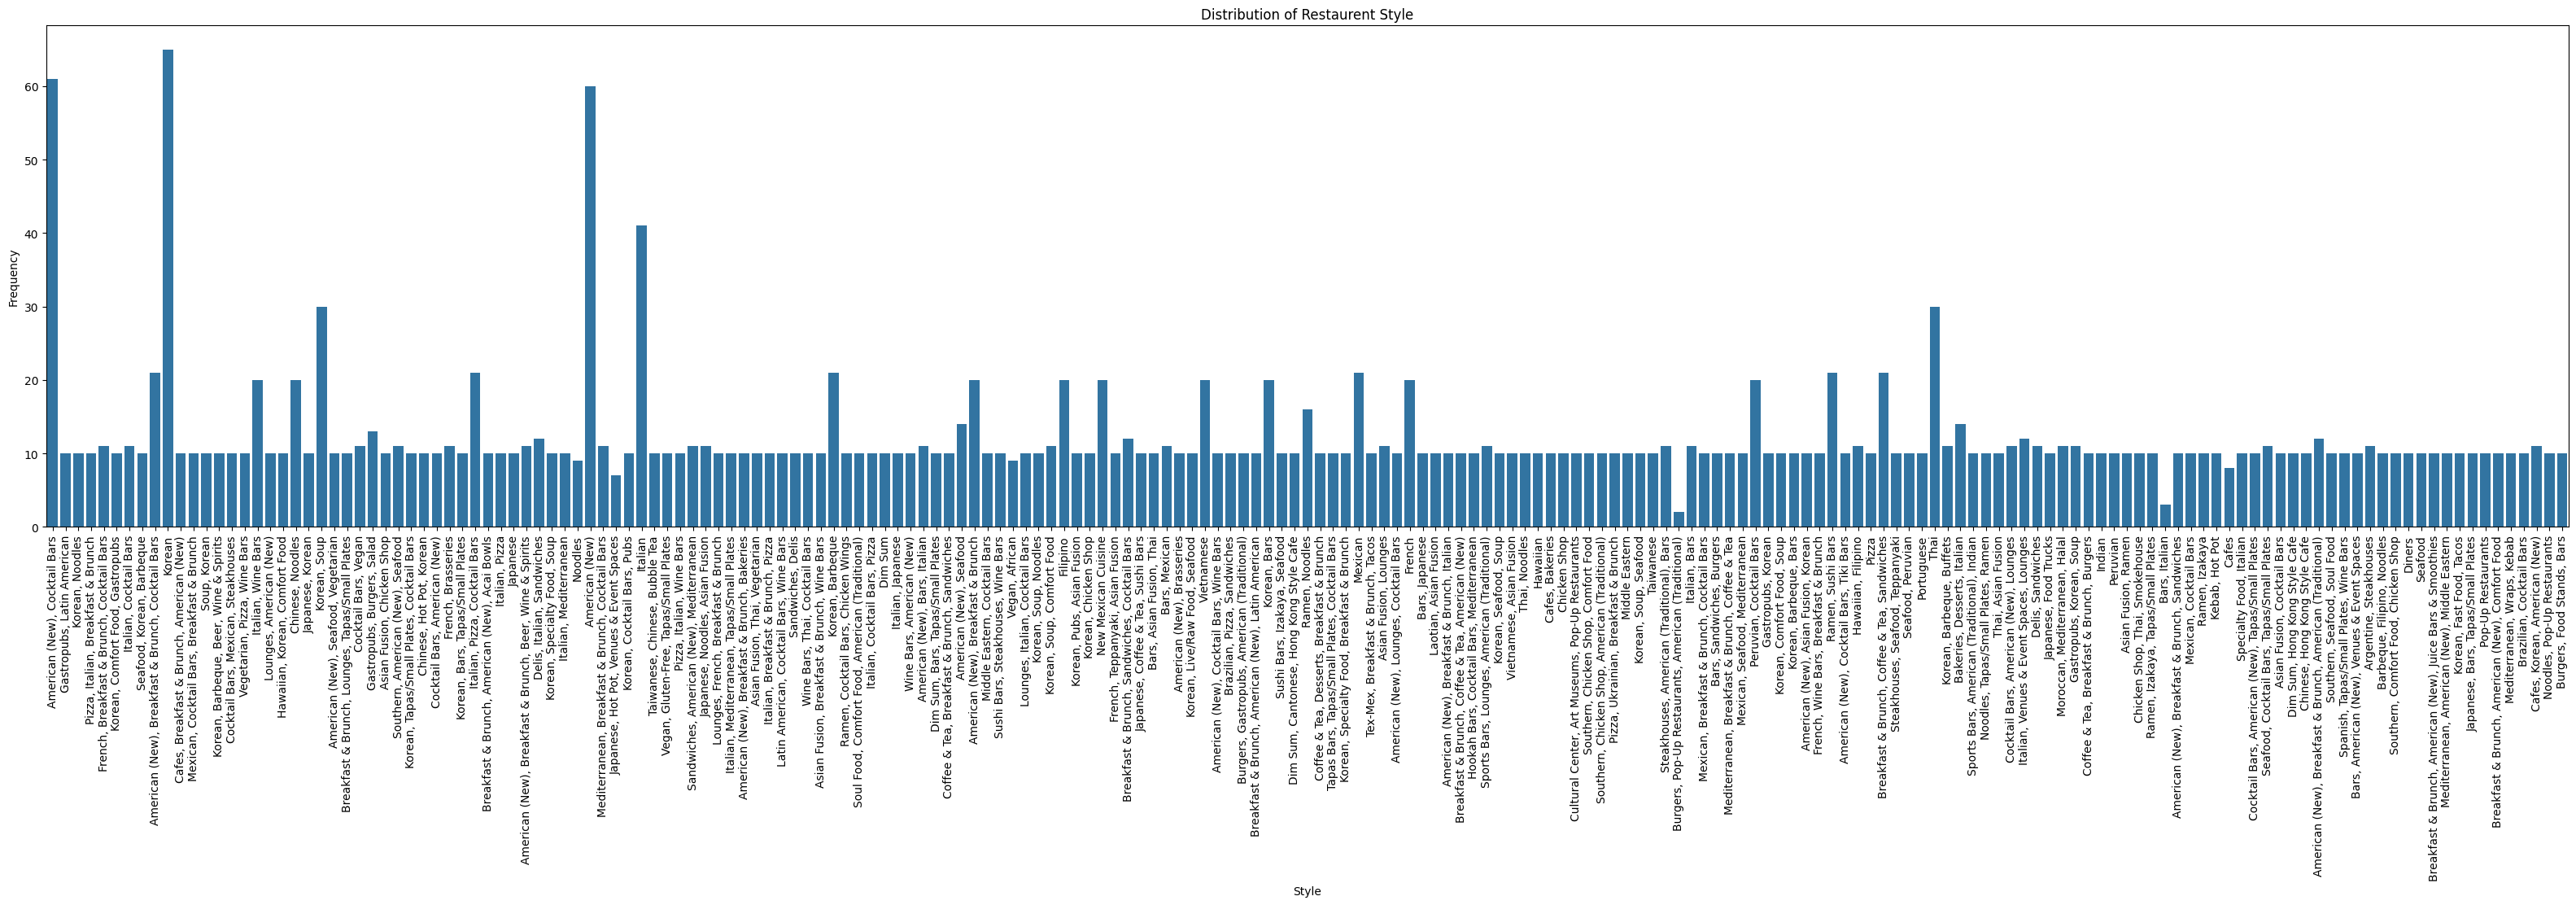

In [9]:
#Distribution of Restaurent Style
plt.figure(figsize=(40,8))
sns.countplot(x='Style',data=df)
plt.title('Distribution of Restaurent Style')
plt.xlabel('Style')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Bivariate and Multivariate Analysis

Star Rating VS Number of Reviews

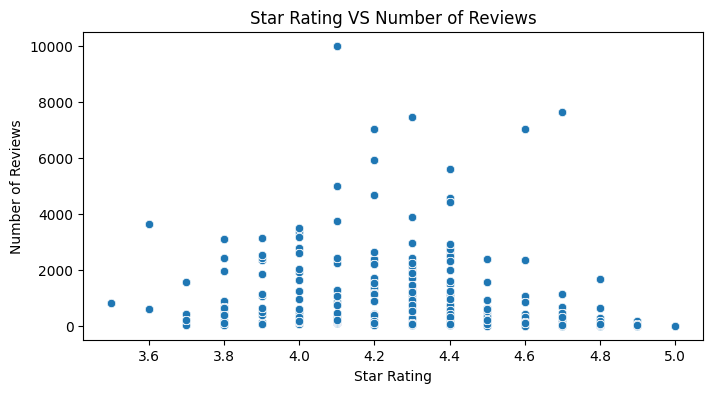

In [10]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='StarRating',y='NumberOfReviews',data=df)
plt.title('Star Rating VS Number of Reviews')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

Handling the missing values
drop rows with missing valuesin essential columns (like Resturantname,StarRating,etc)

In [11]:
df.dropna(subset=['RestaurantName','StarRating','NumberOfReviews','Address','Style'],inplace=True)

In [12]:
# Format Inconsistencies -Ensure consistent data types
df['StarRating']=pd.to_numeric(df['StarRating'],errors='coerce')
df['NumberOfReviews']=pd.to_numeric(df['NumberOfReviews'],errors='coerce')

In [13]:
# Rating Normalization
min_rating=df['StarRating'].min()
max_rating=df['StarRating'].max()
df['NormalizedRating']=(df['StarRating']-min_rating)/(max_rating-min_rating)

In [14]:
# Text Processing for Sentiment Analysis  Preparation
df['Comment']=df['Comment'].str.lower()
df['Comment']=df['Comment'].str.replace('[^\w\s]','')
df['Comment']=df['Comment'].str.strip().replace('\s+',' ',regex=True)

In [15]:
df.head()

,Rank,CommentDate,Date,RestaurantName,Comment,Address,StarRating,NumberOfReviews,Style,NormalizedRating
0,1,2023-09-16,2023-09-17,GRANVILLE,great ambiance indoors and attentive staff. re...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",0.6
1,1,2023-09-15,2023-09-17,GRANVILLE,wrong wrong wrong. aif you don't fit the ty as...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",0.6
2,1,2023-09-07,2023-09-17,GRANVILLE,bad service!! the worst servers. marcos the ma...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",0.6
3,1,2023-09-06,2023-09-17,GRANVILLE,one of my absolute favorite places in weho for...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",0.6
4,1,2023-09-05,2023-09-17,GRANVILLE,always a good experience and food is great.tea...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",0.6


In [16]:
# Save the process data for further use
processed_file_path='/content/processed_data.csv'
df.to_csv(processed_file_path,index=False)

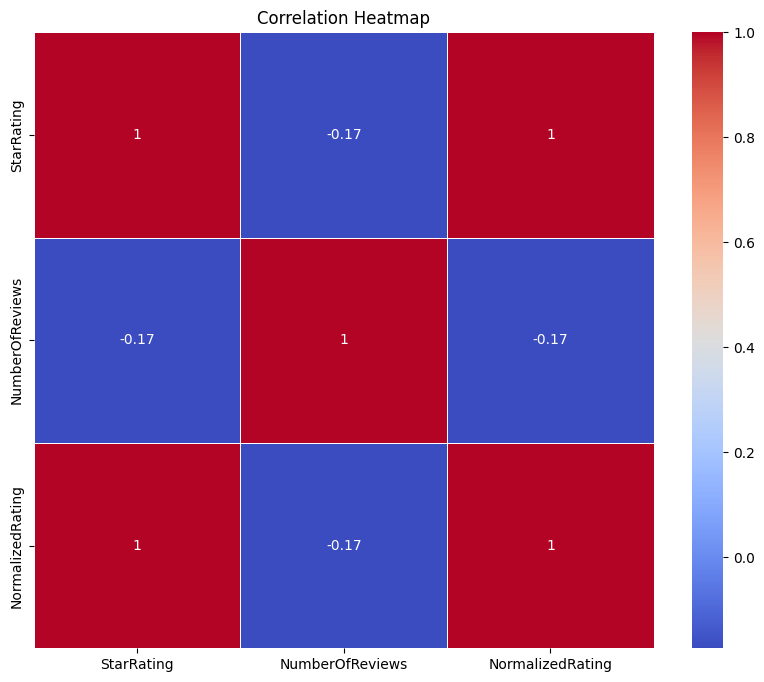

In [17]:
# Correlation Heatmaps
plt.figure(figsize=(10,8))
correlation_matrix=df[['StarRating','NumberOfReviews','NormalizedRating']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Sentiment Analysis on Comments

Textblob Sentiment Analysis(polarityfrom -1to1)

In [18]:
from textblob import TextBlob
df['Polarity']=df['Comment'].apply(lambda x:TextBlob(x).sentiment.polarity)

Text(0, 0.5, 'Frequency')

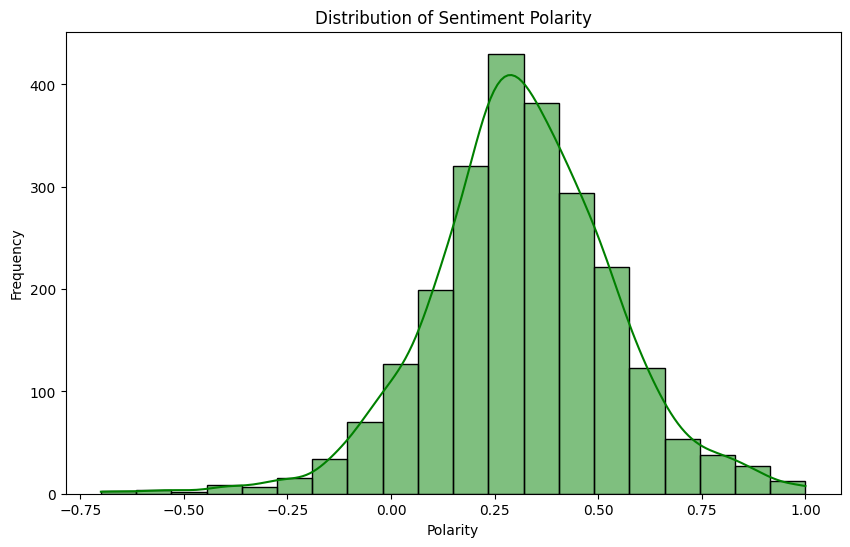

In [19]:
#Distribution of Sentiment Polarity
plt.figure(figsize=(10,6))
sns.histplot(df['Polarity'],bins=20,kde=True,color='green')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

In [20]:
#Top Positive and Negative Reviews
print('Top Positive Reviews:')
print(df[df['Polarity']>0.5]['Comment'].head())
print('\nTop Negative Reviews:')
print(df[df['Polarity']<-0.5]['Comment'].head())

Top Positive Reviews:
3     one of my absolute favorite places in weho for...
4     always a good experience and food is great.tea...
5     these five stars are for the food, service, an...
7     great ambience, generous portions, delicious c...
13    excellent food and service! i've had 2 meals h...
Name: Comment, dtype: object

Top Negative Reviews:
2       bad service!! the worst servers. marcos the ma...
238     don't waste your time and money. food is the w...
351     i'm still waiting for them to contact me and f...
1227    overpriced. bad service. server/manager was li...
1268    one star because i have no choice. horrible se...
Name: Comment, dtype: object


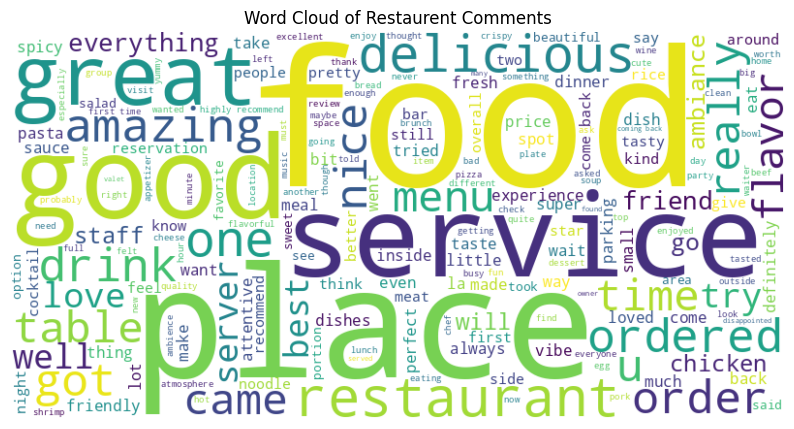

In [21]:
# Word Cloud of Resaurent Comments
from wordcloud import WordCloud

comments_text=' '.join(df['Comment'])

# Generate the Word Cloud
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(comments_text)

# plot the Word Cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Restaurent Comments')
plt.show()

In [22]:
# Top Restaurent Based of Rating and Number Of Reviews
top_restaurants=df.sort_values(by=['StarRating','NumberOfReviews'],ascending=False).sample(10)
print(top_restaurants[['RestaurantName','StarRating','NumberOfReviews','Style']])

                                    RestaurantName  StarRating  \
2149                                  My Two Cents         4.5   
1211                                         OTOTO         4.1   
2027                           Qianlixiang Hot Pot         4.6   
111                               Met Her At A Bar         4.4   
1128                              La Lo La Rooftop         3.8   
102                                         Butnal         4.3   
2029                           Qianlixiang Hot Pot         4.6   
546   The Butcher, The Baker, The Cappuccino Maker         4.0   
1933                             Cabra Los Angeles         4.4   
732                                      Cara Cara         3.9   

      NumberOfReviews                                          Style  
2149              912                   Southern, Seafood, Soul Food  
1211              129                                 Bars, Japanese  
2027               21                                 Kebab,

In [23]:
pivot_table=df.pivot_table(values='StarRating',index='Style',aggfunc='mean')
print(pivot_table)

                                      StarRating
Style                                           
American (New)                              4.15
American (New), Asian Fusion, Korean        4.20
American (New), Bars, Italian               4.10
American (New), Brasseries                  4.50
American (New), Breakfast & Brunch          3.90
...                                          ...
Vegetarian, Pizza, Wine Bars                4.90
Vietnamese                                  3.85
Vietnamese, Asian Fusion                    4.60
Wine Bars, American (New)                   4.10
Wine Bars, Thai, Cocktail Bars              4.40

[196 rows x 1 columns]


# Feature Enginnering

1.1 Feature Extraction from Text (Comment)



In [24]:
# Sentiment Score(Polarity)
df['Sentiment_Polarity']=df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [25]:
# Sentiment Subjectivity (0=objective,1=subjective)
df['Sentiment_Subjectivity']=df['Comment'].apply(lambda x : TextBlob(x).sentiment.subjectivity)

In [26]:
# Word Count
df['Word_Count']=df['Comment'].apply(lambda x : len((x).split()))

In [27]:
# Character Count Feature
df['Character_Count']=df['Comment'].apply(lambda x : len(x))

2 Categorical feature encoding

In [29]:
from sklearn.preprocessing import OneHotEncoder
# Replace 'sparse=False' with 'sparse_output=False'
encoder = OneHotEncoder(sparse_output=False) # Use sparse_output instead of sparse

# Apply OneHotEncoding On'Style'
style_encoded = encoder.fit_transform(df[['Style']])

# Convert NumPy array to Pandas DataFrame
style_encoder_df = pd.DataFrame(style_encoded, columns=encoder.get_feature_names_out(['Style']))

# Concatenate the encoded columns to original dataset
df = pd.concat([df, style_encoder_df], axis=1)

3 Normalization Numerical Features


In [30]:
# Normalize numerical columns like ' StarRating',NumberofReviews','Word_count','char_count'
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['StarRating','NumberOfReviews','Word_Count','Character_Count']]=scaler.fit_transform(df[['StarRating','NumberOfReviews','Word_Count','Character_Count']])

4  Creating Interaction  features

In [31]:
# intraction Between Rating and reviews count(Weighted rating features )
df['Weighted_Rating']=df['StarRating']*df['NumberOfReviews']

#interaction between Sentiment polarity and Rating (combined sentiment  & rating  score)

df['Sentiment_Rating_Interaction']=df['Sentiment_Polarity']*df['StarRating']

5  Feature Selection and final dataset

In [32]:
# Selcet the rellevent featurs for modelling
selected_columns=['RestaurantName','StarRating','NumberOfReviews','Word_Count','Character_Count',
                  'Sentiment_Polarity','Sentiment_Subjectivity','Weighted_Rating',
                  'Sentiment_Rating_Interaction']+list(style_encoder_df.columns)

# Filter the dataset to only include  selected coulmns
final_dataset=df[selected_columns]


In [33]:
# Save the final dataset
final_dataset_path = 'feature_engineered_restaurant_data.csv'
final_dataset.to_csv(final_dataset_path, index=False)

print("Feature Engineering Completed. Data saved to:", final_dataset_path)

Feature Engineering Completed. Data saved to: feature_engineered_restaurant_data.csv


# Hybrid Recommented system

1 Select the relevent features for content -based filtering

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
# Selcet the rellevent features for content -based filtering
content_features=['StarRating','NumberOfReviews','Weighted_Rating','Sentiment_Rating_Interaction']+\
                  [col for col in df.columns if 'Style_' in col]

# Impute missing values with 0
df[content_features] = df[content_features].fillna(0)

# Compute the cosine similarity between restaurent bases on their content features
content_similarity_matrix=cosine_similarity(df[content_features])

# Function to recommend resturant based on content similarity
def recommend_resturant_content(restaurant_name,num_recommendations=5):
  # Find the index of the restaurant
  idx=df[df['RestaurantName']==restaurant_name].index[0]

  # Get the similarity scores for all resturant
  similarity_scores=list(enumerate(content_similarity_matrix[idx]))

  #Sort the restaurant by similarity scores in descending order
  similarity_scores=sorted(similarity_scores,key=lambda x:x[1],reverse=True)

  #get the indice of most similar restautent
  similar_restaurant_indices=[i[0] for i in similarity_scores[1:num_recommendations+1]]

  #Return the recommened resturants
  return df.iloc[similar_restaurant_indices][['RestaurantName','StarRating','NumberOfReviews','Style']]

2. Collaborative filtering

In [37]:
from sklearn.neighbors import NearestNeighbors
# Selecting the features for collaborative filtering
collab_features=['StarRating','NumberOfReviews','Weighted_Rating','Sentiment_Rating_Interaction']

# Impute missing values with 0
df[collab_features]=df[collab_features].fillna(0)

# Initialize KNN model for Collaborative filtering
knn_model=NearestNeighbors(metric='cosine',algorithm='brute')
knn_model.fit(df[collab_features])

# Function to recommend resturant based on collaborative filtering
def recommend_resturant_collab(restaurant_name,num_recommendations=5):
  # Find the index of the restaurant
  idx=df[df['RestaurantName']==restaurant_name].index[0]
  # find the nearest neighbors (similar restaurant)
  distance,indices=knn_model.kneighbors([df.iloc[idx][collab_features]],n_neighbors=num_recommendations+1)

  # Get the indices of the nearest restaurant
  nearest_indices=indices.flatten()[1:]

  # Return the recommended restaurant
  return df.iloc[nearest_indices][['RestaurantName','StarRating','NumberOfReviews','Style']]

3 Hybrid Recoomended

In [38]:
# Function to combine both content-based and collaborative filtering recomendations
def hybrid_recommend(restaurant_name,num_recommendations=5):
  # Get recommendations from content-based filtering
  content_based_recs=recommend_resturant_content(restaurant_name,num_recommendations)

  # Get recommendations from collaborative filtering
  collab_based_recs=recommend_resturant_collab(restaurant_name,num_recommendations)

  # Combine the results
  hybrid_recs=pd.concat([content_based_recs,collab_based_recs]).drop_duplicates().head(num_recommendations)

  return hybrid_recs

In [39]:
# Testing the hybrid Recoomendation System
restaurant_to_recommend='Needle'
num_recommendations=5
print(f"Top {num_recommendations} recommedation based on content and collaborative filtering:")
hybrid_recommendations=hybrid_recommend(restaurant_to_recommend,num_recommendations)

result_df=pd.DataFrame(hybrid_recommendations)

print(result_df)

Top 5 recommedation based on content and collaborative filtering:
     RestaurantName  StarRating  NumberOfReviews  \
2123         Needle    0.733333         0.011080   
1315      Khawaiian    0.666667         0.011479   
1596      Iki Ramen    0.866667         0.010381   
1870       Jail Joa    0.733333         0.013576   
979     Lemon Grove    0.600000         0.007287   

                              Style  
2123  Chinese, Hong Kong Style Cafe  
1315                       Hawaiian  
1596              Ramen, Sushi Bars  
1870       Gastropubs, Korean, Soup  
979        Bars, Asian Fusion, Thai  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [40]:
df.sample()

,Rank,CommentDate,Date,RestaurantName,Comment,Address,StarRating,NumberOfReviews,Style,NormalizedRating,...,"Style_Thai, Noodles","Style_Vegan, African","Style_Vegan, Gluten-Free, Tapas/Small Plates","Style_Vegetarian, Pizza, Wine Bars",Style_Vietnamese,"Style_Vietnamese, Asian Fusion","Style_Wine Bars, American (New)","Style_Wine Bars, Thai, Cocktail Bars",Weighted_Rating,Sentiment_Rating_Interaction
1185,119.0,2023-09-14,2023-09-17,Firefly,came for my birthday dinner and had a wonderfu...,"11720 Ventura Blvd Studio City, CA 91604",0.266667,0.312937,"American (New), Lounges, Cocktail Bars",0.266667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08345,0.103502


In [40]:
# prompt: for your domain knowledge which files requires for devloping the recommended

The provided code uses a CSV file named  `top 240 restaurants recommanded in los angeles 2.csv`.  This is the primary file required.  The code also creates and saves several intermediate CSV files during processing:

1.  **`/content/processed_data.csv`**: This file stores the data after initial preprocessing steps like handling missing values, data type conversions, and rating normalization.

2.  **`feature_engineered_restaurant_data.csv`**: This file contains the dataset after feature engineering, including new features derived from text analysis, categorical encoding, numerical scaling, and interaction features.

Therefore, for development, you need the original `top 240 restaurants recommanded in los angeles 2.csv` file.  The other CSV files are created *by* the code and don't need to be present initially.  If you rerun the code, it will regenerate those intermediate and final files.
